In [3]:
# Make graphs appear within the notebook
%matplotlib inline

# Import numerical computations library
import numpy as np

# Import plotting library
import matplotlib.pyplot as plt

# Import minimization function
from scipy.optimize import minimize

# Import optimization function
import scipy.optimize as opt

# Import functions from AppliedMacroPlots.py
from AppliedMacroPlots import *

# Homework
Assume that there are two countries that share the following same values in the following parameters:
\begin{align}
\delta=0.1, \alpha=0.33, \sigma=2, \beta=0.96
\end{align}

Conduct the following fiscal policy experiments, derive steady-state level of capital and consumption per effective labor and display them in phase diagram:


### Question 1

The following tax rates and government spending are zero in the two countries:
\begin{align}
\tau, \tau^{c}, \tau^{f}, \tau^{w}, g
\end{align}

The capital tax rate and government transfers are zero in the first but positive in the second country:
\begin{align}
\tau^{a}_{1}=v_{1}=0\\
\tau^{a}_{2}=0.2,v_{2}>0
\end{align}

What is the impact of second country's fiscal policy on the levels of capital and consumption per effective labor along the balanced growth path relative to the first country? Explain.

(3.5328789171564186, 1.1633520474676697)
(3.177882143898167, 1.1467660564723443)
 final_simplex: (array([[0.38739982],
       [0.38739982]]), array([0.02632353, 0.0263267 ]))
           fun: 0.026323527867729863
       message: 'Optimization terminated successfully.'
          nfev: 74
           nit: 37
        status: 0
       success: True
             x: array([0.38739982])
 final_simplex: (array([[0.4130613],
       [0.4130613]]), array([0.00017089, 0.00024446]))
           fun: 0.000170893710423422
       message: 'Optimization terminated successfully.'
          nfev: 94
           nit: 47
        status: 0
       success: True
             x: array([0.4130613])


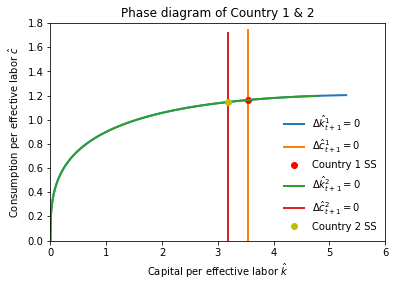

In [11]:
# Your cod
def SteadyState_Fiscal(params,fiscal):
    α = params['α']
    δ = params['δ']
    β = params['β']
    σ = params['σ']
    ρ = 1/β-1
    
    g = fiscal['g']
    tau_a = fiscal['tau_a']
    tau_f = fiscal['tau_f']
    
    k_star = (α/(ρ/((1-tau_a)*(1-tau_f))+δ))**(1/(1-α))
    g_star = g*k_star**α
    c_star = k_star**(α) - (δ)*k_star - g_star
    
    return k_star, c_star

def ResourceConstraint_Fiscal(k, c, params, fiscal):
    α = params['α']
    δ = params['δ']
    g = fiscal['g']
    
    return k**α+(1-δ)*k-c-g*k**α

def EulerEquation_Fiscal(k, c, params, fiscal):
    α = params['α']
    β = params['β']
    σ = params['σ']
    δ = params['δ']
    
    g = fiscal['g']
    tau_f = fiscal['tau_f']
    tau_a = fiscal['tau_a']

    k_next = ResourceConstraint_Fiscal(k, c, params, fiscal)
    
    if k_next > 0:
        r_next= (1-tau_f)*(α*k_next**(α-1)-δ)
        c_next = (β*(1+(1-tau_a)*r_next))**(1/σ) * c 
        return c_next
    else:
        return 0
    
def Constant_k_Fiscal(k, params, fiscal):
    δ = params['δ']
    α = params['α']

    g = fiscal['g']

    
    return (1-g)*k**α - δ*k
# Common Parameters
params = {'α':0.33, 'δ':0.1, 'σ':2, 'β':0.96}
# Fiscal Parameters for 1st country: no taxes and government spending
fiscal_1 = {'g':0, 'tau_a':0, 'tau_f':0}
# Fiscal Parameters for 2nd country: only capital taxes (tau_a=0.2) are positive and government spending is positive 
# which is constant share of output G/Y=g_y=0.2
fiscal_2 = {'g':0, 'tau_a':0.2, 'tau_f':0}

# Steady state
print(SteadyState_Fiscal(params,fiscal_1))
k_star_1, c_star_1 = SteadyState_Fiscal(params,fiscal_1)

print(SteadyState_Fiscal(params,fiscal_2))
k_star_2, c_star_2 = SteadyState_Fiscal(params,fiscal_2)


# Forward equations and convergence criterion

def Path_Fiscal(c_0, k_0, params, fiscal, T=100):
    
    T += 1
    
    k_t = np.zeros(T)
    c_t = np.zeros(T)
    
    k_t[0] = k_0
    c_t[0] = c_0
    
    for t in range(T-1):
        k_t[t+1] = ResourceConstraint_Fiscal(k_t[t], c_t[t], params, fiscal)
        if k_t[t+1] > 0:
            c_t[t+1] = EulerEquation_Fiscal(k_t[t], c_t[t], params, fiscal)
        else:
            k_t[t+1] = 0
            c_t[t+1] = 0
            
    return k_t, c_t

def Path_crit_Fiscal(c_0, k_0, params, fiscal, T=100):
    
    k_t, c_t = Path_Fiscal(c_0, k_0, params, fiscal, T)
    k_star, c_star = SteadyState_Fiscal(params, fiscal)
    
    ss_diff = np.sqrt((k_t-k_star)**2 + (c_t-c_star)**2)
    
    return np.min(ss_diff) + ss_diff[-1]

# Find the function minimum, starting from an initial guess

# First country

k_0_1=k_star_1/20

result= minimize(Path_crit_Fiscal, 0.34, args=(k_0_1, params, fiscal_1, 100), method='Nelder-Mead')
print(result)

c_0_1 = result.x

# Second country
k_0_2=k_star_1/20

result= minimize(Path_crit_Fiscal, 0.34, args=(k_0_2, params, fiscal_2, 100), method='Nelder-Mead')
print(result)

c_0_2 = result.x

# Phase diagram
k_t_1, c_t_1 = Path_Fiscal(c_0_1, k_0_1, params, fiscal_1, 50)
k_t_2, c_t_2 = Path_Fiscal(c_0_2, k_0_2, params, fiscal_2, 50)

kk_1 = np.linspace(0, 1.5*k_star_1, 1000)
cc_1 = np.linspace(0, 1.5*c_star_1, 1000)
kk_2 = np.linspace(0, 1.5*k_star_2, 1000)
cc_2 = np.linspace(0, 1.5*c_star_2, 1000)

plt.plot(kk_1, Constant_k_Fiscal(kk_1, params, fiscal_1), lw=2, label='$\Delta \hat{k}^{1}_{t+1}=0$')
plt.plot(kk_1**0 * k_star_1, cc_1, lw=2, label='$\Delta \hat{c}^{1}_{t+1}=0$')
plt.plot(k_star_1, c_star_1, 'ro', label='Country 1 SS')
#plt.plot(k_t_1, c_t_1, 'k-', label='Saddle path')
plt.plot(kk_2, Constant_k_Fiscal(kk_2, params, fiscal_2), lw=2, label='$\Delta \hat{k}^{2}_{t+1}=0$')
plt.plot(kk_2**0 * k_star_2, cc_2, lw=2, label='$\Delta \hat{c}^{2}_{t+1}=0$')
plt.plot(k_star_2, c_star_2, 'yo', label='Country 2 SS')
#plt.plot(k_t_2, c_t_2, 'k-', label='Saddle path')

plt.title('Phase diagram of Country 1 & 2')
plt.xlabel('Capital per effective labor $\hat{k}$')
plt.ylabel('Consumption per effective labor $\hat{c}$')
plt.legend(loc='lower right')

plt.show()

### Question 2

The following tax rates and government transfers are zero in the two countries:
\begin{align}
\tau, \tau^{c}, \tau^{a}, \tau^{w}, v
\end{align}

The firm tax rate and government spending (fraction of output) are zero in the first but positive in the second country:
\begin{align}
\tau^{f}_{1}=g_{1}=G_{1}/Y_{1}=0\\
\tau^{f}_{2}=0.2,g_{2}=G_{2}/Y_{2}=0.2
\end{align}

What is the impact of second country's fiscal policy on the levels of capital and consumption per effective labor along the balanced growth path relative to the first country? Explain.

(3.5328789171564186, 1.1633520474676697)
(3.177882143898167, 0.8538552022999121)
 final_simplex: (array([[0.38739982],
       [0.38739982]]), array([0.02632353, 0.0263267 ]))
           fun: 0.026323527867729863
       message: 'Optimization terminated successfully.'
          nfev: 74
           nit: 37
        status: 0
       success: True
             x: array([0.38739982])
 final_simplex: (array([[0.30097016],
       [0.30097016]]), array([0.00021448, 0.00023175]))
           fun: 0.00021448457811795493
       message: 'Optimization terminated successfully.'
          nfev: 76
           nit: 38
        status: 0
       success: True
             x: array([0.30097016])


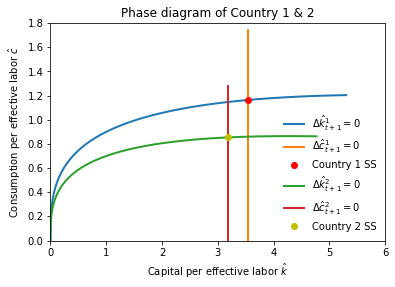

In [5]:
# Define necessary functions

def SteadyState_Fiscal(params,fiscal):
    α = params['α']
    δ = params['δ']
    β = params['β']
    σ = params['σ']
    ρ = 1/β-1
    
    
    g = fiscal['g']
    tau_a = fiscal['tau_a']
    tau_f = fiscal['tau_f']
    
    k_star = (α/(ρ/((1-tau_a)*(1-tau_f))+δ))**(1/(1-α))
    g_star = g*k_star**α
    c_star = k_star**(α) - (δ)*k_star - g_star
    
    return k_star, c_star

def ResourceConstraint_Fiscal(k, c, params, fiscal):
    α = params['α']
    δ = params['δ']
    g = fiscal['g']
    
    return k**α+(1-δ)*k-c-g*k**α

def EulerEquation_Fiscal(k, c, params, fiscal):
    α = params['α']
    β = params['β']
    σ = params['σ']
    δ = params['δ']
    
    g = fiscal['g']
    tau_f = fiscal['tau_f']
    tau_a = fiscal['tau_a']

    k_next = ResourceConstraint_Fiscal(k, c, params, fiscal)
    
    if k_next > 0:
        r_next= (1-tau_f)*(α*k_next**(α-1)-δ)
        c_next = (β*(1+(1-tau_a)*r_next))**(1/σ) * c 
        return c_next
    else:
        return 0
    
def Constant_k_Fiscal(k, params, fiscal):
    δ = params['δ']
    α = params['α']

    g = fiscal['g']

    
    return (1-g)*k**α - δ*k

# Common Parameters
params = {'α':0.33, 'δ':0.1, 'σ':2, 'β':0.96}
# Fiscal Parameters for 1st country: no taxes and government spending
fiscal_1 = {'g':0, 'tau_a':0, 'tau_f':0}
# Fiscal Parameters for 2nd country: only capital taxes (tau_a=0.2) are positive and government spending is positive 
# which is constant share of output G/Y=g_y=0.2
fiscal_2 = {'g':0.2, 'tau_a':0, 'tau_f':0.2}

# Steady state
print(SteadyState_Fiscal(params,fiscal_1))
k_star_1, c_star_1 = SteadyState_Fiscal(params,fiscal_1)

print(SteadyState_Fiscal(params,fiscal_2))
k_star_2, c_star_2 = SteadyState_Fiscal(params,fiscal_2)
def Path_Fiscal(c_0, k_0, params, fiscal, T=100):
    
    T += 1
    
    k_t = np.zeros(T)
    c_t = np.zeros(T)
    
    k_t[0] = k_0
    c_t[0] = c_0
    
    for t in range(T-1):
        k_t[t+1] = ResourceConstraint_Fiscal(k_t[t], c_t[t], params, fiscal)
        if k_t[t+1] > 0:
            c_t[t+1] = EulerEquation_Fiscal(k_t[t], c_t[t], params, fiscal)
        else:
            k_t[t+1] = 0
            c_t[t+1] = 0
            
    return k_t, c_t

def Path_crit_Fiscal(c_0, k_0, params, fiscal, T=100):
    
    k_t, c_t = Path_Fiscal(c_0, k_0, params, fiscal, T)
    k_star, c_star = SteadyState_Fiscal(params, fiscal)
    
    ss_diff = np.sqrt((k_t-k_star)**2 + (c_t-c_star)**2)
    
    return np.min(ss_diff) + ss_diff[-1]
# Find the function minimum, starting from an initial guess

# First country

k_0_1=k_star_1/20

result= minimize(Path_crit_Fiscal, 0.34, args=(k_0_1, params, fiscal_1, 100), method='Nelder-Mead')
print(result)

c_0_1 = result.x

# Second country
k_0_2=k_star_1/20

result= minimize(Path_crit_Fiscal, 0.34, args=(k_0_2, params, fiscal_2, 100), method='Nelder-Mead')
print(result)

c_0_2 = result.x

# Phase diagram
k_t_1, c_t_1 = Path_Fiscal(c_0_1, k_0_1, params, fiscal_1, 50)
k_t_2, c_t_2 = Path_Fiscal(c_0_2, k_0_2, params, fiscal_2, 50)

kk_1 = np.linspace(0, 1.5*k_star_1, 1000)
cc_1 = np.linspace(0, 1.5*c_star_1, 1000)
kk_2 = np.linspace(0, 1.5*k_star_2, 1000)
cc_2 = np.linspace(0, 1.5*c_star_2, 1000)

plt.plot(kk_1, Constant_k_Fiscal(kk_1, params, fiscal_1), lw=2, label='$\Delta \hat{k}^{1}_{t+1}=0$')
plt.plot(kk_1**0 * k_star_1, cc_1, lw=2, label='$\Delta \hat{c}^{1}_{t+1}=0$')
plt.plot(k_star_1, c_star_1, 'ro', label='Country 1 SS')
#plt.plot(k_t_1, c_t_1, 'k-', label='Saddle path')
plt.plot(kk_2, Constant_k_Fiscal(kk_2, params, fiscal_2), lw=2, label='$\Delta \hat{k}^{2}_{t+1}=0$')
plt.plot(kk_2**0 * k_star_2, cc_2, lw=2, label='$\Delta \hat{c}^{2}_{t+1}=0$')
plt.plot(k_star_2, c_star_2, 'yo', label='Country 2 SS')
#plt.plot(k_t_2, c_t_2, 'k-', label='Saddle path')

plt.title('Phase diagram of Country 1 & 2')
plt.xlabel('Capital per effective labor $\hat{k}$')
plt.ylabel('Consumption per effective labor $\hat{c}$')
plt.legend(loc='lower right')

plt.show()

# Question 3

The following tax rates and government transfers are zero in the two countries:
\begin{align}
\tau, \tau^{a}, \tau^{f}, \tau^{w}, v
\end{align}

The consumption tax rate and government spending (fraction of output) are zero in the first but positive in the second country:
\begin{align}
\tau^{c}_{1}=g_{1}=G_{1}/Y_{1}=0\\
\tau^{c}_{2}=0.2,g_{2}=G_{2}/Y_{2}=0.2
\end{align}

What is the impact of second country's fiscal policy on the levels of capital and consumption per effective labor along the balanced growth path relative to the first country? Explain.

(3.5328789171564186, 1.1633520474676697)
(3.5328789171564186, 0.8600240596310074)
 final_simplex: (array([[0.38739982],
       [0.38739982]]), array([0.02632353, 0.0263267 ]))
           fun: 0.026323527867729863
       message: 'Optimization terminated successfully.'
          nfev: 74
           nit: 37
        status: 0
       success: True
             x: array([0.38739982])
 final_simplex: (array([[0.27668136],
       [0.27668136]]), array([0.00242108, 0.00243666]))
           fun: 0.002421080638145049
       message: 'Optimization terminated successfully.'
          nfev: 68
           nit: 34
        status: 0
       success: True
             x: array([0.27668136])


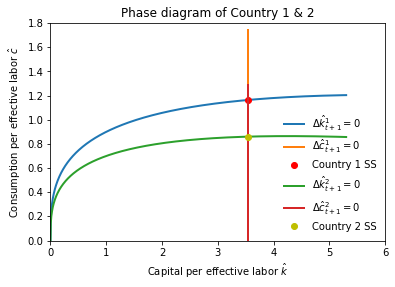

In [10]:
# Define necessary functions

def SteadyState_Fiscal(params,fiscal):
    α = params['α']
    δ = params['δ']
    β = params['β']
    σ = params['σ']
    ρ = 1/β-1
    
    
    g = fiscal['g']
    tau_a = fiscal['tau_a']
    tau_f = fiscal['tau_f']
    
    k_star = (α/(ρ/((1-tau_a)*(1-tau_f))+δ))**(1/(1-α))
    g_star = g*k_star**α
    c_star = k_star**(α) - (δ)*k_star - g_star
    
    return k_star, c_star

def ResourceConstraint_Fiscal(k, c, params, fiscal):
    α = params['α']
    δ = params['δ']
    g = fiscal['g']
    
    return k**α+(1-δ)*k-c-g*k**α

def EulerEquation_Fiscal(k, c, params, fiscal):
    α = params['α']
    β = params['β']
    σ = params['σ']
    δ = params['δ']
    
    g = fiscal['g']
    tau_f = fiscal['tau_f']
    tau_a = fiscal['tau_a']

    k_next = ResourceConstraint_Fiscal(k, c, params, fiscal)
    
    if k_next > 0:
        r_next= (1-tau_f)*(α*k_next**(α-1)-δ)
        c_next = (β*(1+(1-tau_a)*r_next))**(1/σ) * c 
        return c_next
    else:
        return 0
    
def Constant_k_Fiscal(k, params, fiscal):
    δ = params['δ']
    α = params['α']

    g = fiscal['g']

    
    return (1-g)*k**α - δ*k

# Common Parameters
params = {'α':0.33, 'δ':0.1, 'σ':2, 'β':0.96}
# Fiscal Parameters for 1st country: no taxes and government spending
fiscal_1 = {'g':0, 'tau_a':0, 'tau_f':0}
# Fiscal Parameters for 2nd country: only capital taxes (tau_a=0.2) are positive and government spending is positive 
# which is constant share of output G/Y=g_y=0.2
fiscal_2 = {'g':0.2, 'tau_a':0, 'tau_f':0}

# Steady state
print(SteadyState_Fiscal(params,fiscal_1))
k_star_1, c_star_1 = SteadyState_Fiscal(params,fiscal_1)

print(SteadyState_Fiscal(params,fiscal_2))
k_star_2, c_star_2 = SteadyState_Fiscal(params,fiscal_2)
def Path_Fiscal(c_0, k_0, params, fiscal, T=100):
    
    T += 1
    
    k_t = np.zeros(T)
    c_t = np.zeros(T)
    
    k_t[0] = k_0
    c_t[0] = c_0
    
    for t in range(T-1):
        k_t[t+1] = ResourceConstraint_Fiscal(k_t[t], c_t[t], params, fiscal)
        if k_t[t+1] > 0:
            c_t[t+1] = EulerEquation_Fiscal(k_t[t], c_t[t], params, fiscal)
        else:
            k_t[t+1] = 0
            c_t[t+1] = 0
            
    return k_t, c_t

def Path_crit_Fiscal(c_0, k_0, params, fiscal, T=100):
    
    k_t, c_t = Path_Fiscal(c_0, k_0, params, fiscal, T)
    k_star, c_star = SteadyState_Fiscal(params, fiscal)
    
    ss_diff = np.sqrt((k_t-k_star)**2 + (c_t-c_star)**2)
    
    return np.min(ss_diff) + ss_diff[-1]
# Find the function minimum, starting from an initial guess

# First country

k_0_1=k_star_1/20

result= minimize(Path_crit_Fiscal, 0.34, args=(k_0_1, params, fiscal_1, 100), method='Nelder-Mead')
print(result)

c_0_1 = result.x

# Second country
k_0_2=k_star_1/20

result= minimize(Path_crit_Fiscal, 0.34, args=(k_0_2, params, fiscal_2, 100), method='Nelder-Mead')
print(result)

c_0_2 = result.x

# Phase diagram
k_t_1, c_t_1 = Path_Fiscal(c_0_1, k_0_1, params, fiscal_1, 50)
k_t_2, c_t_2 = Path_Fiscal(c_0_2, k_0_2, params, fiscal_2, 50)

kk_1 = np.linspace(0, 1.5*k_star_1, 1000)
cc_1 = np.linspace(0, 1.5*c_star_1, 1000)
kk_2 = np.linspace(0, 1.5*k_star_2, 1000)
cc_2 = np.linspace(0, 1.5*c_star_2, 1000)

plt.plot(kk_1, Constant_k_Fiscal(kk_1, params, fiscal_1), lw=2, label='$\Delta \hat{k}^{1}_{t+1}=0$')
plt.plot(kk_1**0 * k_star_1, cc_1, lw=2, label='$\Delta \hat{c}^{1}_{t+1}=0$')
plt.plot(k_star_1, c_star_1, 'ro', label='Country 1 SS')
#plt.plot(k_t_1, c_t_1, 'k-', label='Saddle path')
plt.plot(kk_2, Constant_k_Fiscal(kk_2, params, fiscal_2), lw=2, label='$\Delta \hat{k}^{2}_{t+1}=0$')
plt.plot(kk_2**0 * k_star_2, cc_2, lw=2, label='$\Delta \hat{c}^{2}_{t+1}=0$')
plt.plot(k_star_2, c_star_2, 'yo', label='Country 2 SS')
#plt.plot(k_t_2, c_t_2, 'k-', label='Saddle path')

plt.title('Phase diagram of Country 1 & 2')
plt.xlabel('Capital per effective labor $\hat{k}$')
plt.ylabel('Consumption per effective labor $\hat{c}$')
plt.legend(loc='lower right')

plt.show()